# Assignment 1 :

### Abstract:
Attrition is the departure of employees from the organization for any reason (voluntary or involuntary), including resignation, termination, death or retirement. In this dataset we are to explore a finctional data created by IBM to find a way to figure out the reasons for attrition or if any key features are related. In this assignment we will also answer the following questions regarding the assignment:
- What are the data types? (Only numeric and categorical)
- Are there missing values?

- What are the likely distributions of the numeric variables?

- Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

- Which independent variables have missing data? How much? 

- Do the training and test sets have the same data?

- In the predictor variables independent of all the other predictor variables?

- Which predictor variables are the most important?

- Do the ranges of the predictor variables make sense?

- What are the distributions of the predictor variables?   

- Remove outliers and keep outliers (does if have an effect of the final predictive model)?

- Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

### Importing the basic libraries required.

In [ ]:
!pip install shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tqdm as tqdm
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#data = pd.read_csv("dataset.csv")
import shap
data = pd.read_csv("https://raw.githubusercontent.com/TarushS-1996/DataScience_001067923/main/IBMHRAttritionDataset.csv")
print(data)

      Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0       

## **Question:** What are the data types? (Only numeric and categorical)
The data types are mostly numeric data except for business travel, Attrition, Department and Education field 

## **Question:** Which independent variables have missing data? How much? **Question:** Are there missing values?



In [ ]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

**Answer:** Above we can see that all the fields have a certain value and do not require any imputation to fill the dataset.

### Data cleaning 
The dataset contains a column to check whether an employee is over 18 years of age. As it is a legal requirement it can be dropped. Similarly columns like HourlyRate, DailyRate EmployeeCount, Education, EducationField can be dropped as they don't directly corelate to attrition reason. 

In [ ]:
#data.drop(['HourlyRate', 'DailyRate', 'EmployeeCount', 'Education', 'EducationField'], axis=1, inplace=True)
one_hot = {'Yes': 1, 'No': 0, 'Y':1, 'N':0, 'Travel_Rarely':2, 'Travel_Frequently':1, 'Non-Travel':3, 'Research & Development':1, 'Sales':2, 'Human Resources': 3}
data.Attrition = [one_hot[item] for item in data.Attrition]
data.Over18 = [one_hot[item] for item in data.Over18]
data.BusinessTravel = [one_hot[item] for item in data.BusinessTravel]
data.Department = [one_hot[item] for item in data.Department]
item_count = data.Department.value_counts()
print(item_count)


1    961
2    446
3     63
Name: Department, dtype: int64


In [ ]:
data_main = data[['Age', 'BusinessTravel', 'DistanceFromHome', 'EnvironmentSatisfaction', 'Department', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'Attrition']]
print(data_main.head())

   Age  BusinessTravel  DistanceFromHome  EnvironmentSatisfaction  Department  \
0   41               2                 1                        2           2   
1   49               1                 8                        3           1   
2   37               2                 2                        4           1   
3   33               1                 3                        4           1   
4   27               2                 2                        1           1   

   JobSatisfaction  MonthlyIncome  MonthlyRate  NumCompaniesWorked OverTime  \
0                4           5993        19479                   8      Yes   
1                2           5130        24907                   1       No   
2                3           2090         2396                   6      Yes   
3                3           2909        23159                   1      Yes   
4                2           3468        16632                   9       No   

   PercentSalaryHike  PerformanceRatin

## **Question:** How are the values distributed?
For this we can use the .describe() method.

In [ ]:
data_main.describe()

,Age,BusinessTravel,DistanceFromHome,EnvironmentSatisfaction,Department,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,Attrition
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,1.913605,9.192517,2.721769,1.389116,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,0.793878,11.279592,2.761224,7.008163,4.229252,2.187755,0.161224
std,9.135373,0.532170,8.106864,1.093082,0.568893,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,0.852077,7.780782,0.706476,6.126525,3.623137,3.222430,0.367863
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,0.000000,6.000000,2.000000,3.000000,2.000000,0.000000,0.000000
50%,36.000000,2.000000,7.000000,3.000000,1.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,1.000000,10.000000,3.000000,5.000000,3.000000,1.000000,0.000000
75%,43.000000,2.000000,14.000000,4.000000,2.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,1.000000,15.000000,3.000000,9.000000,7.000000,3.000000,0.000000
max,60.000000,3.000000,29.000000,4.000000,3.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,3.000000,40.000000,4.000000,40.000000,18.000000,15.000000,1.000000


Above we get a general description of numeric data which mentions the mean, standard deviation, min value, max value etc. From this we can see that all values are positive.


## **Question:** Do the ranges of the predictor variables make sense?
**Answer:**From the above description we can see that the distribution of the values makes sense. 


## **Question:**  What are the likely distributions of the numeric variables?

<Figure size 576x360 with 0 Axes>

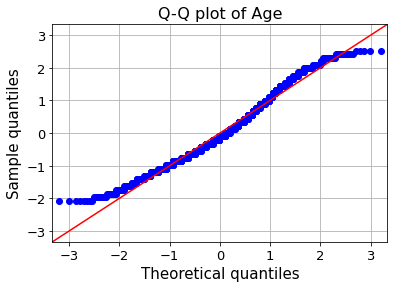

<Figure size 576x360 with 0 Axes>

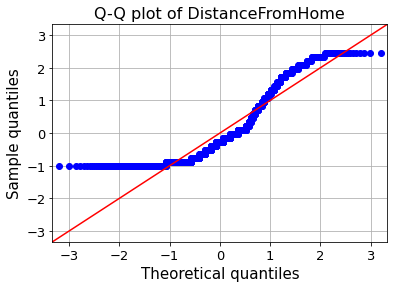

<Figure size 576x360 with 0 Axes>

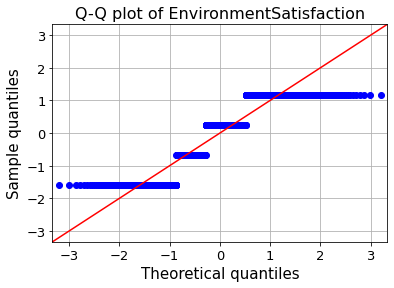

<Figure size 576x360 with 0 Axes>

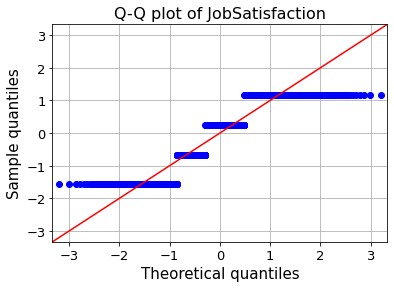

<Figure size 576x360 with 0 Axes>

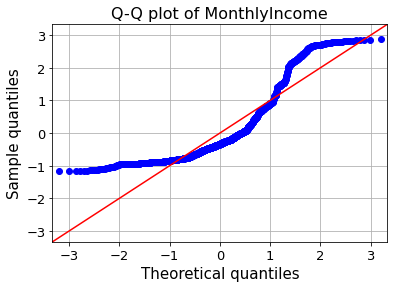

<Figure size 576x360 with 0 Axes>

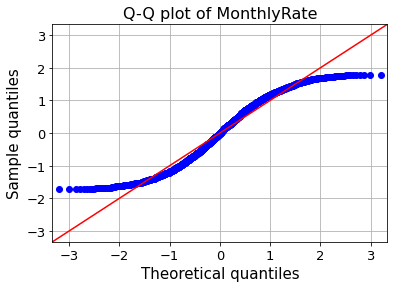

<Figure size 576x360 with 0 Axes>

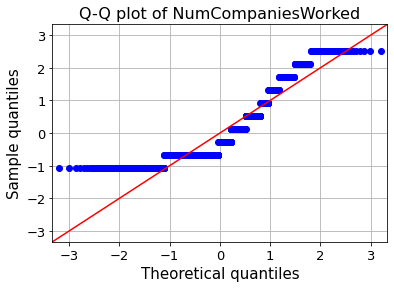

<Figure size 576x360 with 0 Axes>

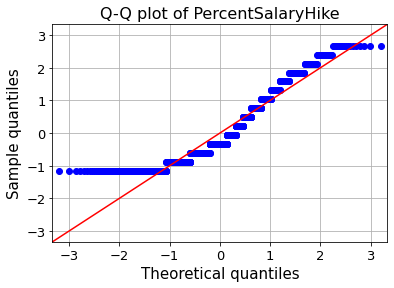

<Figure size 576x360 with 0 Axes>

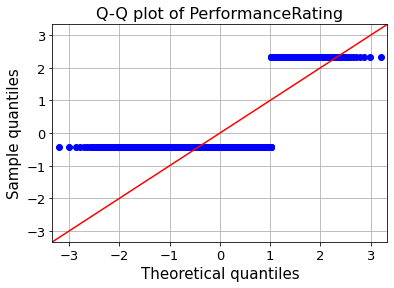

<Figure size 576x360 with 0 Axes>

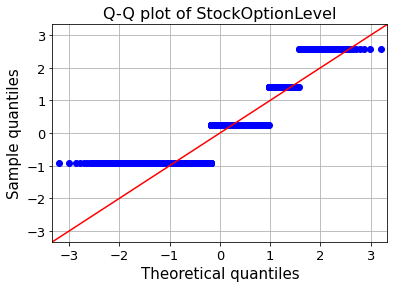

<Figure size 576x360 with 0 Axes>

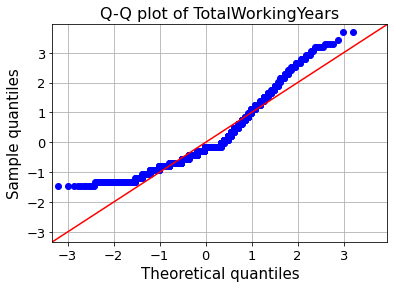

<Figure size 576x360 with 0 Axes>

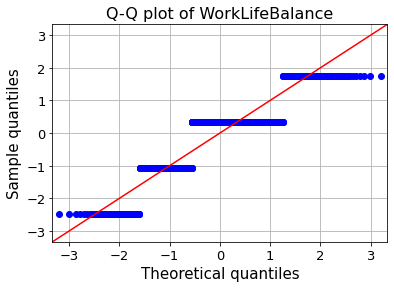

<Figure size 576x360 with 0 Axes>

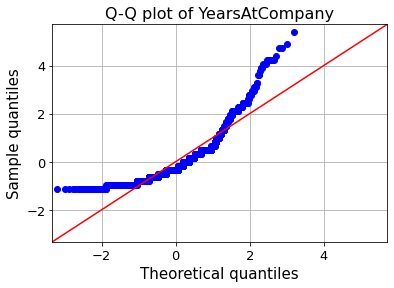

<Figure size 576x360 with 0 Axes>

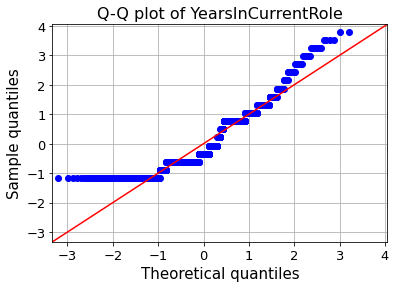

<Figure size 576x360 with 0 Axes>

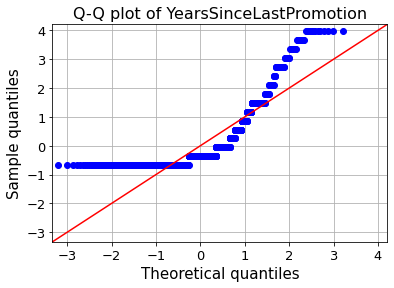

<Figure size 576x360 with 0 Axes>

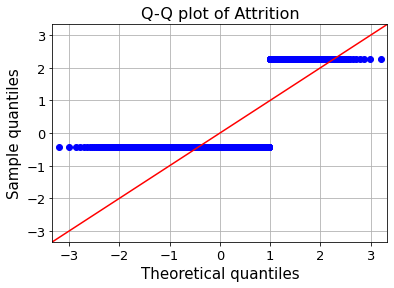

In [ ]:
from statsmodels.graphics.gofplots import qqplot
data_col = data_main[['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'Attrition']]
for c in data_col.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_col[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

The distribution of the value are different for all the columns. The distribution for each of the plots are as following.

|Column name | Distributions|
|------------|:-------------|
| Age        | Continuous distribution|
|DistanceFromHome | Continuous distribution|
|EnvironementSatisfaction| Step distribution |
|JobSatisfaction| Step distribution|
|MonthlyIncome| Continuous distribution|
|MonthlyRate| Continuous distribution|
|NumOfCompaniesWorked| Step distribution|
|PercentOfSalaryHike| Step distribution|
|PerformanceRating | Step distribution|
|StockOptionLevel | Step distribution|
|TotalWorkingYears|Right-skew distribution|
|WorkLifeBalance| Step distribution|
|YearsAtCompany| Right-Skew distribution|
|YearsInCurrentRole|Right-skew|
|YearsSinceLastPromotion|Right-skew|
|Attrition| Step distribution|

# **Data normalization**
We have data and the respective features selected. We want to predict for attrition based on the features we have selected. 

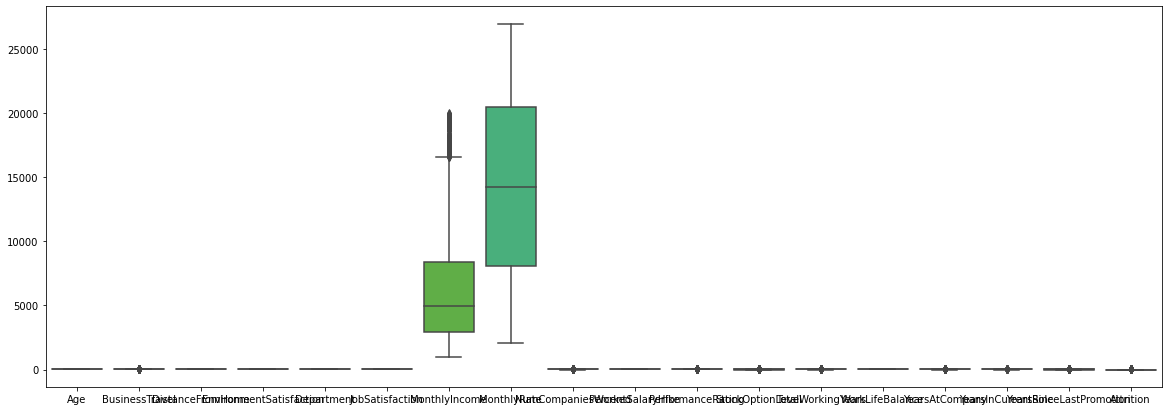

In [ ]:
plt.figure(figsize=(20, 7))
sns.boxplot(data=data_main)

We need to normalize the data for MonthlyIncome and JobSatisfaction. 

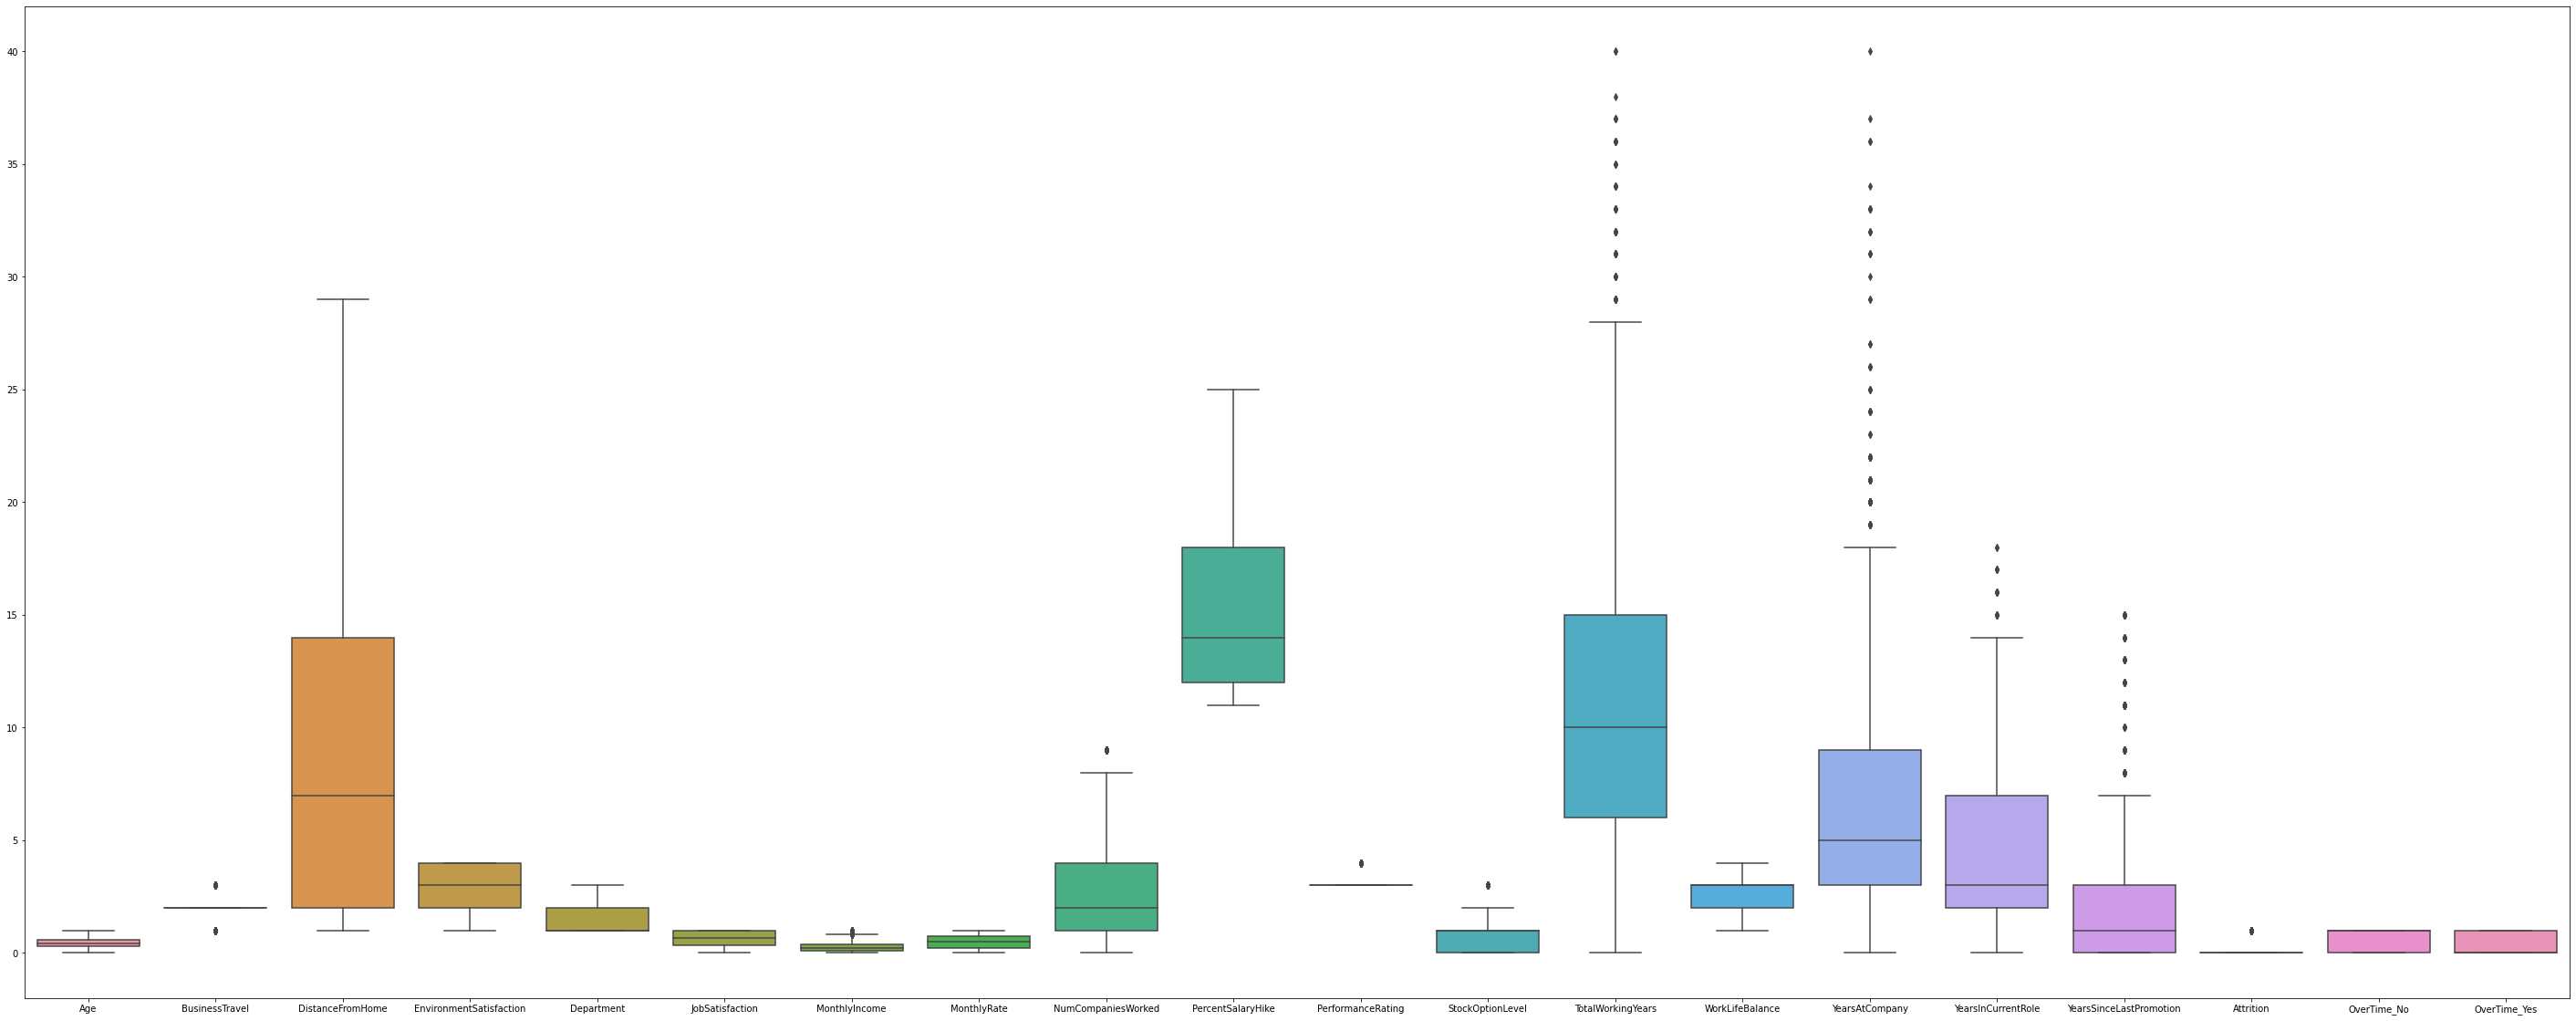

In [ ]:
from sklearn import preprocessing
#data_main = data[['Age', 'BusinessTravel', 'DistanceFromHome', 'EnvironmentSatisfaction', 'Department', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'Attrition']]

dataScaled = pd.get_dummies(data_main)
min_max_scalar = preprocessing.MinMaxScaler()

xJS = dataScaled[['JobSatisfaction']]
xS = min_max_scalar.fit_transform(xJS)
dataScaled[['JobSatisfaction']] = pd.DataFrame(xS)

xMI = dataScaled[['MonthlyIncome']].values.astype(int)
xMIS = min_max_scalar.fit_transform(xMI)
dataScaled['MonthlyIncome'] = pd.DataFrame(xMIS)

xMR = dataScaled[['MonthlyRate']].values.astype(int)
xMRS = min_max_scalar.fit_transform(xMR)
dataScaled['MonthlyRate'] = pd.DataFrame(xMRS)

xA = dataScaled[['Age']].values.astype(int)
xAS = min_max_scalar.fit_transform(xA)
dataScaled['Age'] = pd.DataFrame(xAS)

#for (colName, colValue) in dataScaled.iteritems():
#    xOG = min_max_scalar.fit_transform(colValue)

"""xD = dataScaled[['DistanceFromHome']].values.astype(int)
xDS = min_max_scalar.fit_transform(xD)
dataScaled['DistanceFromHome'] = pd.DataFrame(xDS)



xPSH = dataScaled[['PercentSalaryHike']].values.astype(int)
xPSHS = min_max_scalar.fit_transform(xPSH)
dataScaled['PercentSalaryHike'] = pd.DataFrame(xPSHS)

xTWY = dataScaled[['TotalWorkingYears']].values.astype(int)
xTWYS = min_max_scalar.fit_transform(xTWY)
dataScaled['TotalWorkingYears'] = pd.DataFrame(xTWYS)"""

data_main = dataScaled

plt.figure(figsize=(50, 20))
sns.boxplot(data=data_main)

From the table we can see that TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion and NumOfCompaniesWorked have outliers. If we go back to the QQ plot of these variables we can see that 

|Column Name|Meaning|Distribution|
|-----------|:------|:-----------|
|TotalWorkingYears|values are clustered around the left tail of the distribution |Right-skew distribution|
|YearsAtCompany|values are clustered around the left tail of the distribution|Right-skew distribution|
|YearsInCurrentRole|values are clustered around the left tail of the distribution|Right-skew distribution|
|YearsSinceLastPromotion|values are clustered around the left tail of the distribution|Right-skew distribution|

### **Question:** What are the distributions of the predictor variables?

**Answer:** From above table we can the distribution of predictor variables.

## **Question:** Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

# **Answer:**

# **Method 1:**
By using correlations we can see that certain values have a higher importance. To better visualize this we will use heatmap.

In [ ]:
data_main.corr()

,Age,BusinessTravel,DistanceFromHome,EnvironmentSatisfaction,Department,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,Attrition,OverTime_No,OverTime_Yes
Age,1.000000,0.011807,-0.001686,0.010146,-0.007652,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.037510,0.680381,-0.021490,0.311309,0.212901,0.216513,-0.159205,-0.028062,0.028062
BusinessTravel,0.011807,1.000000,0.009696,0.011310,0.005436,-0.008666,0.013450,0.008440,0.030743,0.025727,-0.001683,0.028257,-0.007972,-0.004209,-0.005212,0.005336,-0.005222,-0.127006,0.042752,-0.042752
DistanceFromHome,-0.001686,0.009696,1.000000,-0.016075,0.002196,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.044872,0.004628,-0.026556,0.009508,0.018845,0.010029,0.077924,-0.025514,0.025514
EnvironmentSatisfaction,0.010146,0.011310,-0.016075,1.000000,-0.026110,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.003432,-0.002693,0.027627,0.001458,0.018007,0.016194,-0.103369,-0.070132,0.070132
Department,-0.007652,0.005436,0.002196,-0.026110,1.000000,-0.006231,0.056573,-0.004124,-0.011261,-0.034933,-0.029648,-0.015585,-0.006602,0.075507,0.029752,0.009204,0.008394,0.077351,-0.000340,0.000340
JobSatisfaction,-0.004892,-0.008666,-0.003669,-0.006784,-0.006231,1.000000,-0.007157,0.000644,-0.055699,0.020002,0.002297,0.010690,-0.020185,-0.019459,-0.003803,-0.002305,-0.018214,-0.103481,-0.024539,0.024539
MonthlyIncome,0.497855,0.013450,-0.017014,-0.006259,0.056573,-0.007157,1.000000,0.034814,0.149515,-0.027269,-0.017120,0.005408,0.772893,0.030683,0.514285,0.363818,0.344978,-0.159840,-0.006089,0.006089
MonthlyRate,0.028051,0.008440,0.027473,0.037600,-0.004124,0.000644,0.034814,1.000000,0.017521,-0.006429,-0.009811,-0.034323,0.026442,0.007963,-0.023655,-0.012815,0.001567,0.015170,-0.021431,0.021431
NumCompaniesWorked,0.299635,0.030743,-0.029251,0.012594,-0.011261,-0.055699,0.149515,0.017521,1.000000,-0.010238,-0.014095,0.030075,0.237639,-0.008366,-0.118421,-0.090754,-0.036814,0.043494,0.020786,-0.020786
PercentSalaryHike,0.003634,0.025727,0.040235,-0.031701,-0.034933,0.020002,-0.027269,-0.006429,-0.010238,1.000000,0.773550,0.007528,-0.020608,-0.003280,-0.035991,-0.001520,-0.022154,-0.013478,0.005433,-0.005433


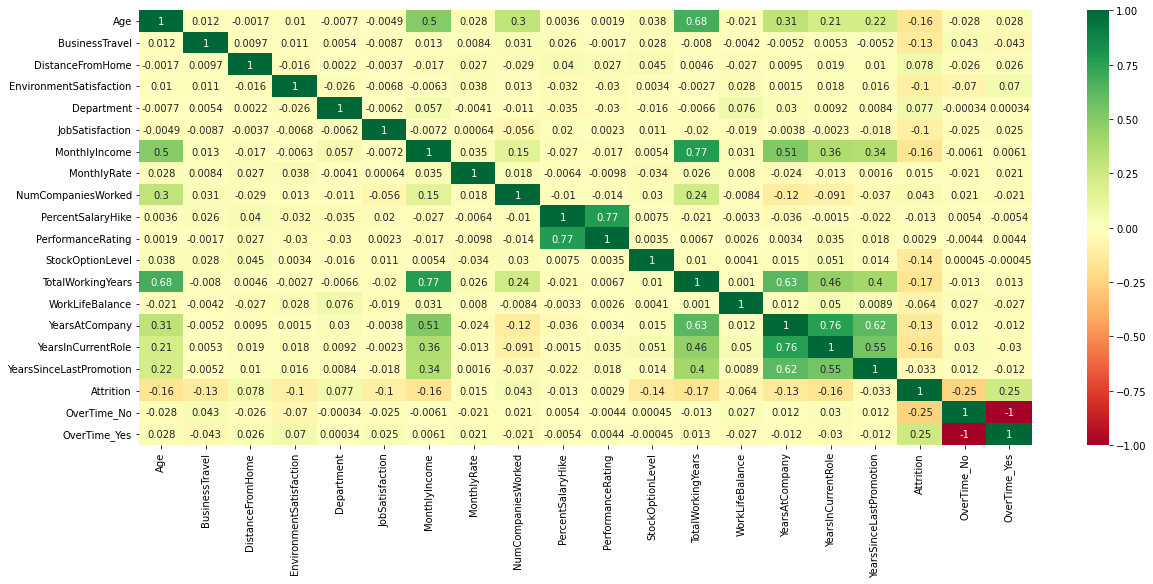

In [ ]:
plt.figure(figsize=(20,8))
sns.heatmap(data_main.corr(), annot=True, cmap='RdYlGn')

### **Question:** Which predictor variables are the most important?

From this we can relate that attrition is more dependent on Performance rating, Monthly rate, number of companies worked at, distance from home, work life balance.
### **Question:** In the predictor variables independent of all the other predictor variables?

**Answer:** From the above correlation matrix we can see that some of the variables are dependant on the other. They are:

|Value 1|Value 2|
|---|:---|
|MonthlyIncome|TotalWorkingYears|
|Age|TotalWorkingYears|
|YearsAtCompany|YearsInCurrentRole|

# **Method 2:**
By using model summary using ordinary least squared regression, we can see that higher T-statistic value gives more importance to the significance of the predictor variables. 


In [ ]:
import statsmodels.api as sm

model = sm.OLS(data_main.Attrition, data_main).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Attrition   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.311e+30
Date:                Sun, 05 Feb 2023   Prob (F-statistic):               0.00
Time:                        00:18:01   Log-Likelihood:                 48325.
No. Observations:                1470   AIC:                        -9.661e+04
Df Residuals:                    1450   BIC:                        -9.650e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Age                      6.245e-17   2.19e-16      0.285      0.776   -3.67e-16    4.92e-16
BusinessTravel            7.98e-17   6.39e-17      1.249      0.212   -4.55e-17    2.05e-16
DistanceFromHome         7.698e-18   4.18e-18      1.843      0.066   -4.97e-19    1.59e-17
EnvironmentSatisfaction  1.388e-17   3.12e-17      0.445      0.656   -4.72e-17     7.5e-17
Department               2.758e-16   5.98e-17      4.609      0.000    1.58e-16    3.93e-16
JobSatisfaction          3.886e-16   9.23e-17      4.211      0.000    2.08e-16     5.7e-16
MonthlyIncome            1.041e-16   2.16e-16      0.481      0.631   -3.21e-16    5.29e-16
MonthlyRate             -7.182e-16   1.18e-16     -6.083      0.000    -9.5e-16   -4.87e-16
NumCompaniesWorked       -4.64e-17   1.51e-17     -3.072      0.002    -7.6e-17   -1.68e-17
PercentSalaryHike        1.054e-16   1.46e-17      7.241      0.000    7.69e-17    1.34e-16
PerformanceRating       -5.482e-16   1.48e-16     -3.715      0.000   -8.38e-16   -2.59e-16
StockOptionLevel        -7.806e-18      4e-17     -0.195      0.845   -8.63e-17    7.07e-17
TotalWorkingYears       -5.291e-17   9.35e-18     -5.660      0.000   -7.12e-17   -3.46e-17
WorkLifeBalance           1.11e-16    4.8e-17      2.313      0.021    1.69e-17    2.05e-16
YearsAtCompany           2.212e-17   1.06e-17      2.080      0.038    1.26e-18     4.3e-17
YearsInCurrentRole        8.11e-17   1.46e-17      5.560      0.000    5.25e-17     1.1e-16
YearsSinceLastPromotion  5.876e-17   1.35e-17      4.346      0.000    3.22e-17    8.53e-17
Attrition                   1.0000   1.02e-16   9.84e+15      0.000       1.000       1.000
OverTime_No              5.065e-16   4.13e-16      1.225      0.221   -3.04e-16    1.32e-15
OverTime_Yes             5.412e-16   4.21e-16      1.287      0.198   -2.84e-16    1.37e-15
==============================================================================
Omnibus:                        4.113   Durbin-Watson:                   0.660
Prob(Omnibus):                  0.128   Jarque-Bera (JB):                4.038
Skew:                           0.127   Prob(JB):                        0.133
Kurtosis:                       3.041   Cond. No.                         439.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# **Method 3:**
We can also use model feature importance to get a better idea of the values that can be used to predict better variables. For this we will use model coefficients.

For this we will need to do the following:
1. Build a model
2. Fit the values of X and Y to the model
3. Use model.coef_ to get the values determining the important variables. 


# Building model

In [ ]:
from sklearn.model_selection import train_test_split

x = data_main[['Age', 'BusinessTravel', 'DistanceFromHome', 'EnvironmentSatisfaction', 'Department', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion']]
#x = data_main[['BusinessTravel', 'DistanceFromHome', 'Department', 'JobSatisfaction', 'PercentSalaryHike', 'WorkLifeBalance', 'YearsAtCompany']]
y = data_main[['Attrition']]

print(x.head())

        Age  BusinessTravel  DistanceFromHome  EnvironmentSatisfaction  \
0  0.547619               2                 1                        2   
1  0.738095               1                 8                        3   
2  0.452381               2                 2                        4   
3  0.357143               1                 3                        4   
4  0.214286               2                 2                        1   

   Department  JobSatisfaction  MonthlyIncome  MonthlyRate  \
0           2         1.000000       0.262454     0.698053   
1           1         0.333333       0.217009     0.916001   
2           1         0.666667       0.056925     0.012126   
3           1         0.666667       0.100053     0.845814   
4           1         0.333333       0.129489     0.583738   

   NumCompaniesWorked  PercentSalaryHike  PerformanceRating  StockOptionLevel  \
0                   8                 11                  3                 0   
1                   

In [ ]:
X_t, X_test, y_t, y_test = train_test_split(x, y, test_size=0.1, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

# **Question:** Do the training and test sets have the same data?



In [ ]:
check_df = pd.merge(
    X_t,
    X_test,
    on=['Age', 'BusinessTravel', 'DistanceFromHome', 'EnvironmentSatisfaction', 'Department', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion'],
    how="left",
    indicator="Exist",
)
check_df["Exist"] = np.where(check_df.Exist == "both", True, False)
print(
    check_df["Exist"].value_counts()
) 

False    1323
Name: Exist, dtype: int64


**Answer:** From the above code, we can see that the train and test sets are different. 

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[[-1.14583011e+00 -8.52673378e-01  3.31250460e-02 -1.92296970e-01
   4.80803540e-01 -8.68012563e-01 -1.14851143e+00 -2.60848701e-01
   1.35963633e-01 -2.48134845e-02  9.03038520e-02 -5.82358733e-01
  -4.15911791e-02 -4.14284958e-01  8.84488796e-04 -2.08267535e-01
   1.97357678e-01]]
                ColumnNames  Coefficients
0                       Age     -1.145830
1            BusinessTravel     -0.852673
2          DistanceFromHome      0.033125
3   EnvironmentSatisfaction     -0.192297
4                Department      0.480804
5           JobSatisfaction     -0.868013
6             MonthlyIncome     -1.148511
7               MonthlyRate     -0.260849
8        NumCompaniesWorked      0.135964
9         PercentSalaryHike     -0.024813
10        PerformanceRating      0.090304
11         StockOptionLevel     -0.582359
12        TotalWorkingYears     -0.041591
13          WorkLifeBalance     -0.414285
14           YearsAtCompany      0.000884
15       YearsInCurrentRole     -0.208268
16

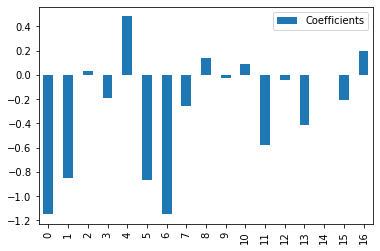

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score

scaler = preprocessing.StandardScaler().fit(x_train)
lregr = LogisticRegression(solver='lbfgs', max_iter=300)
lregr.fit(x_train, y_train.values.ravel())

print(lregr.coef_)
#ax = x_train.plot.bar(y = lregr.coef_)
pad = pd.DataFrame()
pad['ColumnNames'] = x_train.columns.values
pad['Coefficients'] = lregr.coef_[0]
pad.plot.bar()
print(pad)

From this we can figure out that the values we predicted to be important variables are same across the different methods. Now we can progress with predicting the attrition value. Now as we can see there are negative values. This basically states that the the values are negatively impacting the Y variable; meaning if these values are higher, chance of attrition becomes lower.

# **Question:** Remove outliers and keep outliers (does if have an effect of the final predictive model)?

For this we create two versions of train, test and validation set. One with outliers, one without outliers.

## Using Logistic regression to predict attrition with outliers:

In [ ]:
y_predict = lregr.predict(x_train)
print('Mean squared error is: {}'.format(mean_squared_error(y_train, y_predict)))
print('Coefficient of determination: %.2f'% r2_score(y_train, y_predict))
r2 = r2_score(y_train,y_predict)
print('R^2 score on tarining set =',r2)
score = accuracy_score(y_train,y_predict)
print("Accuracy score is: {}".format(score))

Mean squared error is: 0.1396797153024911
Coefficient of determination: -0.06
R^2 score on tarining set = -0.057657268891445845
Accuracy score is: 0.8603202846975089


In [ ]:
y_pred = lregr.predict(X_test)
print('Mean squared error is: {}'.format(mean_squared_error(y_test,y_pred)))
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on tarining set =',r2)
score = accuracy_score(y_test,y_pred)
print("Accuracy score is: {}".format(score))

Mean squared error is: 0.19727891156462585
Coefficient of determination: -0.19
R^2 score on tarining set = -0.18548387096774177
Accuracy score is: 0.8027210884353742


In [ ]:
y_pred = lregr.predict(x_val)
print('Mean squared error is: {}'.format(mean_squared_error(y_val,y_pred)))
print('Coefficient of determination: %.2f'% r2_score(y_val, y_pred))
r2 = r2_score(y_val,y_pred)
print('R^2 score on tarining set =',r2)
score = accuracy_score(y_val,y_pred)
print("Accuracy score is: {}".format(score))

Mean squared error is: 0.1407035175879397
Coefficient of determination: -0.10
R^2 score on tarining set = -0.09901380670611437
Accuracy score is: 0.8592964824120602


# **Using Logistic regression to predict attrition with outliers**
Now we remove the outliers from the dataset and repeat the logistic regression.

In [ ]:
from scipy import stats
def removeOutliers(df):
  data = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
  return data

# Removing outliers from the datasets for training and testing
data_main_NoOutliers = removeOutliers(data_main)
x = data_main_NoOutliers[['Age', 'BusinessTravel', 'DistanceFromHome', 'EnvironmentSatisfaction', 'Department', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion']]
#x = data_main[['BusinessTravel', 'DistanceFromHome', 'Department', 'JobSatisfaction', 'PercentSalaryHike', 'WorkLifeBalance', 'YearsAtCompany']]
y = data_main_NoOutliers[['Attrition']]
X_t, X_test, y_t, y_test = train_test_split(x, y, test_size=0.1, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)
scaler = preprocessing.StandardScaler().fit(x_train)
lregr = LogisticRegression(solver='lbfgs', max_iter=300)
lregr.fit(x_train, y_train.values.ravel())

LogisticRegression(max_iter=300)

In [ ]:
y_predict = lregr.predict(x_train)
print('Mean squared error is: {}'.format(mean_squared_error(y_train, y_predict)))
print('Coefficient of determination: %.2f'% r2_score(y_train, y_predict))
r2 = r2_score(y_train,y_predict)
print('R^2 score on tarining set =',r2)
score = accuracy_score(y_train,y_predict)
print("Accuracy score is: {}".format(score))

Mean squared error is: 0.14178403755868543
Coefficient of determination: -0.05
R^2 score on tarining set = -0.04699992187296509
Accuracy score is: 0.8582159624413146


In [ ]:
y_pred = lregr.predict(X_test)
print('Mean squared error is: {}'.format(mean_squared_error(y_test,y_pred)))
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on tarining set =',r2)
score = accuracy_score(y_test,y_pred)
print("Accuracy score is: {}".format(score))

Mean squared error is: 0.15
Coefficient of determination: -0.02
R^2 score on tarining set = -0.02260869565217405
Accuracy score is: 0.85


In [ ]:
y_pred = lregr.predict(x_val)
print('Mean squared error is: {}'.format(mean_squared_error(y_val,y_pred)))
print('Coefficient of determination: %.2f'% r2_score(y_val, y_pred))
r2 = r2_score(y_val,y_pred)
print('R^2 score on tarining set =',r2)
score = accuracy_score(y_val,y_pred)
print("Accuracy score is: {}".format(score))

Mean squared error is: 0.15425531914893617
Coefficient of determination: -0.09
R^2 score on tarining set = -0.0921474358974359
Accuracy score is: 0.8457446808510638


**Answer:** Yes the removal of outliers has some reduction in scores.

### **Question:** Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values? That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.
# Imputing the data for 1%, 5% and 10%
Now we want to impute data for the column 'TotalWorkingYears'. If we return to correlations table, we can see that the TotalWorkingYears is more dependant on the values 'Age', 'MonthlyIncome', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion' and 'NumCompaniesWorked' and thus will be more important to imputing the values with lesser percent change to the orignal values. 

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
data_mainImpute = data_main.copy(deep=True)
def removeRandomData(dataset, percent, col):
    dataset.loc[dataset.sample(frac = percent).index, col] = np.nan
#removeRandomData(data_mainImpute, 0.05, 'TotalWorkingYears')
#Imputation of 10% of the data
data_mainImpute['TotalWorkingYears_10'] = data_mainImpute['TotalWorkingYears']
data_mainImpute['TotalWorkingYears_05'] = data_mainImpute['TotalWorkingYears']
data_mainImpute['TotalWorkingYears_01'] = data_mainImpute['TotalWorkingYears']

removeRandomData(data_mainImpute, 0.10, 'TotalWorkingYears_10')
removeRandomData(data_mainImpute, 0.05, 'TotalWorkingYears_05')
removeRandomData(data_mainImpute, 0.01, 'TotalWorkingYears_01')
print(data_mainImpute.isnull().sum())

Age                          0
BusinessTravel               0
DistanceFromHome             0
EnvironmentSatisfaction      0
Department                   0
JobSatisfaction              0
MonthlyIncome                0
MonthlyRate                  0
NumCompaniesWorked           0
PercentSalaryHike            0
PerformanceRating            0
StockOptionLevel             0
TotalWorkingYears            0
WorkLifeBalance              0
YearsAtCompany               0
YearsInCurrentRole           0
YearsSinceLastPromotion      0
Attrition                    0
OverTime_No                  0
OverTime_Yes                 0
TotalWorkingYears_10       147
TotalWorkingYears_05        74
TotalWorkingYears_01        15
dtype: int64


<h4>Making dataframes for different percent removed data</h4>

In [ ]:
df_number1 = data_mainImpute[['Age', 'MonthlyIncome', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'NumCompaniesWorked', 'TotalWorkingYears_01']]
df_number5 = data_mainImpute[['Age', 'MonthlyIncome', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'NumCompaniesWorked', 'TotalWorkingYears_05']]
df_number10 = data_mainImpute[['Age', 'MonthlyIncome', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'NumCompaniesWorked', 'TotalWorkingYears_10']]
df_orignal = data_mainImpute['TotalWorkingYears']

In [ ]:
### Specifying the imputer. ###
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

### FOR the 1 % imputed values using Mean method ###
mean_imputer = mean_imputer.fit(df_number1)
results = mean_imputer.transform(df_number1.values)
imputed_number_df = pd.DataFrame(mean_imputer.transform(results), columns = df_number1.columns)
print(imputed_number_df.isnull().sum())
results.round()
imputed_number_df['TotalWorkingYears'] = df_orignal
imputed_number_df['orignalVimputed_01'] = imputed_number_df['TotalWorkingYears'].sub(imputed_number_df['TotalWorkingYears_01'], axis = 0)
percent_change_1 = (imputed_number_df['orignalVimputed_01'].sum() / imputed_number_df['orignalVimputed_01'].count())*100

mean_imputer = mean_imputer.fit(df_number5)
results = mean_imputer.transform(df_number5.values)
imputed_number_df = pd.DataFrame(mean_imputer.transform(results), columns = df_number5.columns)
results.round()
imputed_number_df['TotalWorkingYears'] = df_orignal
imputed_number_df['orignalVimputed_05'] = imputed_number_df['TotalWorkingYears'].sub(imputed_number_df['TotalWorkingYears_05'], axis = 0)
percent_change_5 = (imputed_number_df['orignalVimputed_05'].sum() / imputed_number_df['orignalVimputed_05'].count())*100

mean_imputer = mean_imputer.fit(df_number10)
results = mean_imputer.transform(df_number10.values)
imputed_number_df = pd.DataFrame(mean_imputer.transform(results), columns = df_number10.columns)
results.round()
imputed_number_df['TotalWorkingYears'] = df_orignal
imputed_number_df['orignalVimputed_10'] = imputed_number_df['TotalWorkingYears'].sub(imputed_number_df['TotalWorkingYears_10'], axis = 0)
percent_change_10 = (imputed_number_df['orignalVimputed_10'].sum() / imputed_number_df['orignalVimputed_10'].count())*100


print("The perecent change of the orignal vs imputed value for 1% missing data is: {}".format(percent_change_1))
print("The perecent change of the orignal vs imputed value for 5% missing data is: {}".format(percent_change_5))
print("The perecent change of the orignal vs imputed value for 10% missing data is: {}".format(percent_change_10))

Age                        0
MonthlyIncome              0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
NumCompaniesWorked         0
TotalWorkingYears_01       0
dtype: int64
The perecent change of the orignal vs imputed value for 1% missing data is: 0.124132127077634
The perecent change of the orignal vs imputed value for 5% missing data is: -0.1926787907139919
The perecent change of the orignal vs imputed value for 10% missing data is: 6.114890400604678


X does not have valid feature names, but SimpleImputer was fitted with feature names
X does not have valid feature names, but SimpleImputer was fitted with feature names
X does not have valid feature names, but SimpleImputer was fitted with feature names
X does not have valid feature names, but SimpleImputer was fitted with feature names
X does not have valid feature names, but SimpleImputer was fitted with feature names
X does not have valid feature names, but SimpleImputer was fitted with feature names


## Using Median for Imputation

In [ ]:
### Specifying the imputer. ###
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='median')

### FOR the 1 % imputed values using Median method ###
mean_imputer = mean_imputer.fit(df_number1)
results = mean_imputer.transform(df_number1.values)
imputed_number_df = pd.DataFrame(mean_imputer.transform(results), columns = df_number1.columns)
print(imputed_number_df.isnull().sum())
results.round()
imputed_number_df['TotalWorkingYears'] = df_orignal
imputed_number_df['orignalVimputed_01'] = imputed_number_df['TotalWorkingYears'].sub(imputed_number_df['TotalWorkingYears_01'], axis = 0)
percent_change_1 = (imputed_number_df['orignalVimputed_01'].sum() / imputed_number_df['orignalVimputed_01'].count())*100

mean_imputer = mean_imputer.fit(df_number5)
results = mean_imputer.transform(df_number5.values)
imputed_number_df = pd.DataFrame(mean_imputer.transform(results), columns = df_number5.columns)
results.round()
imputed_number_df['TotalWorkingYears'] = df_orignal
imputed_number_df['orignalVimputed_05'] = imputed_number_df['TotalWorkingYears'].sub(imputed_number_df['TotalWorkingYears_05'], axis = 0)
percent_change_5 = (imputed_number_df['orignalVimputed_05'].sum() / imputed_number_df['orignalVimputed_05'].count())*100

mean_imputer = mean_imputer.fit(df_number10)
results = mean_imputer.transform(df_number10.values)
imputed_number_df = pd.DataFrame(mean_imputer.transform(results), columns = df_number10.columns)
results.round()
imputed_number_df['TotalWorkingYears'] = df_orignal
imputed_number_df['orignalVimputed_10'] = imputed_number_df['TotalWorkingYears'].sub(imputed_number_df['TotalWorkingYears_10'], axis = 0)
percent_change_10 = (imputed_number_df['orignalVimputed_10'].sum() / imputed_number_df['orignalVimputed_10'].count())*100


print("The perecent change of the orignal vs imputed value for 1% missing data is: {}".format(percent_change_1))
print("The perecent change of the orignal vs imputed value for 5% missing data is: {}".format(percent_change_5))
print("The perecent change of the orignal vs imputed value for 10% missing data is: {}".format(percent_change_10))

Age                        0
MonthlyIncome              0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
NumCompaniesWorked         0
TotalWorkingYears_01       0
dtype: int64
The perecent change of the orignal vs imputed value for 1% missing data is: 1.4285714285714286
The perecent change of the orignal vs imputed value for 5% missing data is: 6.258503401360545
The perecent change of the orignal vs imputed value for 10% missing data is: 18.299319727891156


X does not have valid feature names, but SimpleImputer was fitted with feature names
X does not have valid feature names, but SimpleImputer was fitted with feature names
X does not have valid feature names, but SimpleImputer was fitted with feature names
X does not have valid feature names, but SimpleImputer was fitted with feature names
X does not have valid feature names, but SimpleImputer was fitted with feature names
X does not have valid feature names, but SimpleImputer was fitted with feature names


## Using KNN

In [ ]:
from sklearn.metrics import accuracy_score
imputer = KNNImputer(n_neighbors=7)
### For the 1% imputation ###
imputer.fit_transform(df_number1)
imputed_number_df = pd.DataFrame(imputer.fit_transform(df_number1), columns = df_number1.columns)
print(imputed_number_df.isnull().sum())
imputed_number_df['TotalWorkingYears'] = df_orignal
imputed_number_df['orignalVimputed_01'] = data_main['TotalWorkingYears'].sub(imputed_number_df['TotalWorkingYears_01'], axis = 0)
percent_change_1 = (imputed_number_df['orignalVimputed_01'].sum() / imputed_number_df['orignalVimputed_01'].count())*100
print("The perecent change of the orignal vs imputed value of 1% values is: {}".format(percent_change_1))

### For the 5% imputation ###
imputer.fit_transform(df_number5)
imputed_number_df = pd.DataFrame(imputer.fit_transform(df_number5), columns = df_number5.columns)
imputed_number_df['TotalWorkingYears'] = df_orignal
imputed_number_df['orignalVimputed_05'] = data_main['TotalWorkingYears'].sub(imputed_number_df['TotalWorkingYears_05'], axis = 0)
percent_change_5 = (imputed_number_df['orignalVimputed_05'].sum() / imputed_number_df['orignalVimputed_05'].count())*100
print("The perecent change of the orignal vs imputed value of 5% values is: {}".format(percent_change_5))

### For the 10% imputation ###
imputer.fit_transform(df_number10)
imputed_number_df = pd.DataFrame(imputer.fit_transform(df_number10), columns = df_number10.columns)
imputed_number_df['TotalWorkingYears'] = df_orignal
imputed_number_df['orignalVimputed_10'] = data_main['TotalWorkingYears'].sub(imputed_number_df['TotalWorkingYears_10'], axis = 0)
percent_change_10 = (imputed_number_df['orignalVimputed_10'].sum() / imputed_number_df['orignalVimputed_10'].count())*100
print("The perecent change of the orignal vs imputed value of 10% values is: {}".format(percent_change_10))

#dataFrame_knn_imputation = imputed_number_df[['orignalVimputed_01', 'orignalVimputed_05', 'orignalVimputed_10']]

Age                        0
MonthlyIncome              0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
NumCompaniesWorked         0
TotalWorkingYears_01       0
dtype: int64
The perecent change of the orignal vs imputed value of 1% values is: 0.6899902818270165
The perecent change of the orignal vs imputed value of 5% values is: -0.2526724975704568
The perecent change of the orignal vs imputed value of 10% values is: 7.210884353741497


**Answer:** From above we can see that mean has the highest percentage change. We can also see that mean and KNN are predicting values that are higher than the orignal value for 1% and 5% imputed data. For 10% KNN seems to predict values that are a bit lower than the orignal value most of the time. As for median, it seems to be predicting mostly lower than the orignal value. 

|Method| Percentage Imputed| Percentage change|
|------|:-----------------|:------------------|
|Mean | 1%|-0.04|
| | 5%|-3.03|
| | 10%|-10.02|
|Median| 1%| 0.84|
| | 5%|6.47|
| | 10%|0.07|
|KNN| 1%|-0.76|
| | 5%|-0.56|
| | 10%|5.17|

## **MIT License**
Copyright (c) 2023 Tarush Ghanshyam Singh

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

##References 

- https://www.analyticsvidhya.com/blog/2021/09/q-q-plot-ensure-your-ml-model-is-based-on-the-right-distributions/

- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

- https://scikit-learn.org/stable/modules/impute.html

- https://www.ucd.ie/ecomodel/Resources/QQplots_WebVersion.html#:~:text=Normally%20distributed%20data,-Below%20is%20an&text=The%20normal%20distribution%20is%20symmetric,deviate%20from%20the%20straight%20line).